# Поиск клиентов с неоптимальными тарифами для провайдера виртуальной телефонии

## Описание проекта
### Основная задача и входные данные
<b>Заказчик</b> - отдел по работе с клиентами провайдера виртуальной телефонии. Его клиенты - юридические лица (колл-центры). 

**Задача:** выделить активных клиентов, для которых оптимальный тариф не совпадает с текущим, и подобрать для них новый (более выгодный для них) тариф. 

**Как применят результаты исследования:** по итогам исследования отдел по работе с клиентами предложит указанным нами клиентам перейти на более выгодный тариф. Это нужно, чтобы не дать конкурентам преимущества в предложении более выгодных условий и не допустить оттока клиентов.

**Образ конечного результата:**   
- обоснованная таблица с тремя столбцами - индентификатор клиента, старый тариф, новый тариф (рекомендуемый по результатам анализа);
- тетрадка JupyterNotebook со всеми расчетами, выводами и пояснениями результатов;
- презентация для продуктового менеджера, рассчитанная на небольшое сообщение - пять-семь минут и содержащую ответы на главные вопросы;
- дашборд, иллюстрирующий пример отчета, который может быть автоматизирован и использован, как часть функционала системы.

### Описание исходных данных
**Исходные данные*:** от Заказчика (провайдера) получено две таблицы с данными о его клиентах (юр.лицах - колл-центрах). Заказчик просит использовать весь период, за который собраны и предоставлены  данные. 

**Описание тарифных планов Заказчика:**

**Ежемесячная плата за тариф:** 
- Тариф А — 4000 ₽,  
- Тариф B — 2000 ₽,  
- Тариф С — 1000 ₽.

**Дополнительная ежемесячная плата за каждого оператора:**  
- Тариф А — 50 ₽, 
- Тариф B — 150 ₽, 
- Тариф С — 300 ₽.

**Входящие и внутренние звонки — бесплатны на всех тарифах.**

**Исходящие звонки внутри сети, включённые в тариф:**  
- Тариф А — 2000 минут,
- Тариф B — 500 минут, 
- Тариф С — нет.

**Цена сверх лимита:**  
- A — 0.1 ₽/мин.,
- B — 0.15 ₽/мин., 
- C — 0.3 ₽/мин.

**Исходящие звонки, кроме внутренних:**
- A — 0.3 ₽/мин., 
- B — 0.5 ₽/мин., 
- C — 0.7 ₽/мин.

**Структура файла telecom_dataset.csv с предоставленными данными:**
- `user_id` — идентификатор клиента;
- `date` — дата статистики;  
- `direction` - направление вызовов: out — исходящий вызов, in — входящий; 
- `internal` - маркер внутренних и внешних вызовов;
- `operator_id` - идентификатор оператора;
- `is_missed_call` - маркер пропущенных вызовов;
- `calls_count` - количество звонков;
- `call_duration` - длительность звонка без учёта времени ожидания;
- `total_call_duration` - длительность звонка с учётом времени ожидания.

**Структура файла telecom_clients.csv с предоставленными данными:**
- `user_id` — идентификатор клиента;
- `tariff_plan` — тарифный план клиента;
- `date_start` - дата регистрации клиента в сервисе.

### План исследования

1. **Загрузить, изучить и предобработать данные**. 
При предобработке данных найти (если есть) и при необходимости обработать:
- пропуски,
- явные и неявные дубликаты,
- неверные типы данных,
- неверные форматы данных (например, даты),
- выбросы и аномалии.
2. **Определить единицы измерения данных (времени):**   
- сгруппировать данные по колл-центрам и дате, вычислить суммарную длительность звонков за эту дату в каждом колл-центре (без учета времени ожидания - по столбцу call_duration). Отсортировать таблицу по суммам call_duration по убыванию. 
- изучить, какая медианная сумма звонка в колл-центрах за день.
- сгруппировать данные по колл-центрам, и посчитать медианную длительность звонков каждому колл-центру.
- найти наиболее приближенный по своей медиане времени разговоров колл-центр к медианному времени, которое мы нашли по всем колл-центрам. Изучить данные по разговорам этого колл-центра, и сколько у него операторов.
- сделать выводы о том, какие единицы измерения времени в исходных данных.
3. **Изучить период сбора предоставленных данных и принять решение об используемом для анализа периоде (возможно, что за какой-то период данных не хватает).**
- изучить, за какой период предоставлены данные.
- построить гистограмму суммарного количества звонков за каждый месяц статистики. Посмотреть, достаточно ли данных о звонках во все месяцы.
- сделать срез данных для дальнейшего анализа, если за какой-то период данных недостаточно. 
4. **Принять решение, каких пользователей считать активными и учитывать в анализе:**
- посчитать суммарное количество не пропущенных звонков по каждому колл-центру.
- посчитать количество операторов в каждом колл-центре.
- изучить, у всех ли кол-центров есть звонки и операторы. Принять решение, считать ли подобных клиентов активными.
- рассчитать соотношение количества звонков к количеству операторов в каждом колл-центре в месяц (так как клиенты разное количество времени зарегистрированы в сервисе Заказчика).
- принять решение о том, какое соотношение количества звонков к количеству операторов в каждом колл-центре в месяц считать достаточным для определения клиента как активного.
- сформулировать понятие "активный клиент", удалить из данных данные о неактивных клиентах, чтобы не учитывать их в анализе.

5. **Провести аналитическое исследование**:  
- изучить общие показатели данных (средняя длительность звонков, количество активных и неактивных клиентов - колл-центров, количество операторов у клиентов). 
- выделить клиентов, для которых оптимальный тариф не совпадает с текущим, а именно:

1) получим расходы клиентов за каждый месяц из периода анализа на каждом из тарифов - один тариф будет соответствовать текущему (фактическим расходам клиента, два других - возможные для перехода);  
2) вычислим средние затраты клиента за месяц за период анализа на каждом тарифе.  
3) сравним среднее текущего тарифа с двумя другими средними тарифов. Создадим новый столбец с рекомендуемым тарифом. Если из средних сумм на каком-то тарифе есть сумма меньше, то запишем в столбец с рекомендуемым тарифом новый тариф. Если текущие затраты у клиента были меньше по сравнению с другими, запишем в столбец с рекомендуемым тарифом текущий тариф.    
4) создадим новую таблицу-срез, где у клиента (колл-центра) старый тариф не совпадает с новым тарифом.

- показать изменение в выручке для заказчика (общей, в месяц, на клиента) при смене тарифов: в таблице с клиентами со старым и новым тарифом вычесть сумму старых платежа из суммы прогнозируемых платежей, чтобы показать, какой процент выручки в месяц потеряет Заказчик.
- проверить 2 статистические гипотезы:  

1) Гипотеза №1 - Уменьшится ли выручка Заказчика, если клиенты перейдут на более выгодные для них тарифы?  
- **Нулевая гипотеза:** значение выручки Заказчика за месяц при текущих тарифах клиентов **равна** значению выручки Заказчика за месяц при переходе клиентов на более выгодные для них тарифы.

- **Альтернативная гипотеза:** значение выручки Заказчика за месяц при текущих тарифах клиентов **больше**, чем будет значение выручки Заказчика за месяц при переходе клиентов на более выгодные для них тарифы.

2) Гипотеза №2 - Выручка на тарифе А значительно больше, чем на двух других тарифах.

- **Нулевая гипотеза:** выручка Заказчика за месяц на тарифе А **выше** значения выручки Заказчика за месяц на двух других тарифах.

- **Альтернативная гипотеза:** выручка Заказчика за месяц на тарифе А **такая же или ниже** значения выручки Заказчика за месяц на двух других тарифах.

6. **Оформление результатов, выводов, рекомендаций**.
- оформить таблицу с тремя столбцами - индентификатор тарифа, старый тариф, новый тариф (рекомендуемый по результатам анализа).
- написать обоснования для таблицы с результатами, выводы и рекомендации для Заказчика.
7. **Формирование отчета**.
- оформить тетрадку JupyterNotebook со всеми расчетами, выводами и пояснениями результатов для Заказчика.
8. **Подготовить презентацию для продуктового менеджера Заказчика** в формате PDF.  
- презентация должна быть рассчитанна на небольшое сообщение - пять-семь минут и содержать ответы на главные вопросы.

## Загрузка данных и общая информация

In [1]:
#загрузим библиотеки
import pandas as pd
import seaborn as sns
import os
import datetime as dt
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math as mth
from statsmodels.stats.multitest import multipletests
from plotly import graph_objects as go
import plotly.express as px

In [2]:
#загрузим и посмотрим исходные данные датафрейма telecom_dataset.csv
data = pd.read_csv('telecom_dataset.csv')

display(data.head(15))
data.info()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25
5,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,False,2,3,29
6,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
7,166377,2019-08-05 00:00:00+03:00,in,False,NaN,True,6,0,35
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
9,166377,2019-08-06 00:00:00+03:00,in,False,NaN,True,4,0,62


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


### Общий вывод о данных датафрейма telecom_dataset.csv
В датафрейме telecom_dataset.csv представлено 53.902 строки с данными о звонках и их характеристиках.  
При предобработке данных необходимо будет проверить их на дубликаты.

В данных есть пропуски в столбцах `internal` и `operator_id` (значительное количество пропусков в этом столбце).  
При предобработке данных необходимо будет изучить пропуски подробнее и при необходимости - заполнить или удалить данные.

В столбце `date` указан неверный тип данных - object, нужен datetime64. Так же лучше будет изменить формат дат на отображение только дат - без времени (оно везде нулевое, так как данные в таблицы агрегированы по дням).  
В столбце `internal` указан неверный тип данных - object, нужен bool, так как значения в столбце - True и False.
В столбце `operator_id` указан неверный тип данных - float64, нужен int64 (так как идентификатор оператора - не дробное, а целое число). 
Остальные типы данных указаны верно.

Неизвестно, какие единицы измерения времени использованы в столбцах с длительностью звонков (`call_duration`, `total_call_duration`) - необходимо будет выяснить это при анализе.

In [3]:
#загрузим и посмотрим исходные данные датафрейма telecom_clients.csv
tariffs = pd.read_csv('telecom_clients.csv')

display(tariffs.head())
tariffs.info()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


### Общий вывод о данных датафрейма telecom_clients.csv
В датафрейме telecom_clients.csv представлено 732 строки с данными о тарифах клиентов и дате регистрации клиента в сервисе. 
При предобработке данных необходимо будет проверить их на дубликаты.  

В данных нет пропусков.

В столбце `date_start` указан неверный тип данных - object, нужен datetime64. 
Остальные типы данных указаны верно.

## Предобработка данных

### Дубликаты

In [4]:
# посмотрим количество строк-дубликатов в обоих датафреймах
cnt_dupl_data = len(data) - len(data.drop_duplicates()) 
cnt_dupl_tariffs = len(tariffs) - len(tariffs.drop_duplicates()) 
print(f'Количество дубликатов в telecom_dataset.csv: {cnt_dupl_data}')
print(f'Количество дубликатов в telecom_clients.csv: {cnt_dupl_tariffs}')

Количество дубликатов в telecom_dataset.csv: 4900
Количество дубликатов в telecom_clients.csv: 0


В таблице telecom_dataset.csv 4.900 дубликатов - это больше 9% данных. Рассмотрим дубликаты поближе на предмет какой-то зависимости. 

In [5]:
data_copy = data.copy() #создадим временный дф для проверки
data_copy['duplicats'] = data_copy.duplicated()
data_copy.query('duplicats == True')

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,duplicats
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50,True
28,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0,34,True
44,166377,2019-08-14 00:00:00+03:00,out,False,880026.0,False,10,1567,1654,True
45,166377,2019-08-14 00:00:00+03:00,in,False,NaN,True,1,0,3,True
51,166377,2019-08-15 00:00:00+03:00,out,False,880026.0,False,11,1413,1473,True
...,...,...,...,...,...,...,...,...,...,...
53869,168601,2019-11-25 00:00:00+03:00,in,False,952914.0,False,7,1229,1282,True
53874,168601,2019-11-26 00:00:00+03:00,in,False,952914.0,False,4,539,562,True
53875,168601,2019-11-26 00:00:00+03:00,in,False,NaN,True,3,0,35,True
53885,168603,2019-11-20 00:00:00+03:00,out,False,959118.0,True,3,0,89,True


Похоже, дубликаты не имеют никакой зависимости. Удалим их из датафрейма:

In [6]:
data = data.drop_duplicates()
cnt_dupl_data = len(data) - len(data.drop_duplicates()) 
print(f'Количество дубликатов в data: {cnt_dupl_data}')
data.info()

Количество дубликатов в data: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49002 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              49002 non-null  int64  
 1   date                 49002 non-null  object 
 2   direction            49002 non-null  object 
 3   internal             48892 non-null  object 
 4   operator_id          41546 non-null  float64
 5   is_missed_call       49002 non-null  bool   
 6   calls_count          49002 non-null  int64  
 7   call_duration        49002 non-null  int64  
 8   total_call_duration  49002 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.4+ MB


Мы удалили дубликаты из данных, теперь приступим к обработке пропусков в данных.

### Пропуски

Займемся пропусками в данных - они есть в столбцах `internal` (110 пропусков = 0,2% данных) и `operator_id` (7.456 пропусков = 15% данных - значительное количество).  

Сначала посмотрим пропуски в столбце `internal`:

In [7]:
data.query('internal != internal').head(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
1007,166405,2019-09-18 00:00:00+03:00,in,NaN,NaN,True,1,0,59
1090,166405,2019-10-01 00:00:00+03:00,in,NaN,NaN,True,1,0,1
1864,166406,2019-08-20 00:00:00+03:00,in,NaN,NaN,True,1,0,36
1924,166406,2019-09-02 00:00:00+03:00,in,NaN,879898.0,False,1,2,9
6210,166541,2019-09-26 00:00:00+03:00,in,NaN,908960.0,False,1,393,423
6216,166541,2019-09-26 00:00:00+03:00,in,NaN,908958.0,False,2,547,612
7523,166604,2019-10-31 00:00:00+03:00,in,NaN,NaN,True,1,0,5
7528,166604,2019-11-01 00:00:00+03:00,in,NaN,893402.0,False,1,94,117
8650,166658,2019-09-24 00:00:00+03:00,in,NaN,890404.0,False,1,150,157
9080,166658,2019-10-15 00:00:00+03:00,in,NaN,890404.0,False,1,51,57


In [8]:
# посмотрим, все ли вызовы из них - входящие
data.query('internal != internal and direction == "out"')

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
21004,167016,2019-10-23 00:00:00+03:00,out,NaN,NaN,True,3,0,196
51367,168291,2019-11-28 00:00:00+03:00,out,NaN,NaN,True,3,0,93


Почти все звонки с NaN в столбце `internal` - входящие (значит, бесплатные для наших клиентов и не повлияют на расчеты стоимости тарифов). Удалим строки с пропусками в `internal` из датафрейма (потеря данных минимальна - 0,2%):

In [9]:
data = data.query('internal == internal').copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48892 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              48892 non-null  int64  
 1   date                 48892 non-null  object 
 2   direction            48892 non-null  object 
 3   internal             48892 non-null  object 
 4   operator_id          41491 non-null  float64
 5   is_missed_call       48892 non-null  bool   
 6   calls_count          48892 non-null  int64  
 7   call_duration        48892 non-null  int64  
 8   total_call_duration  48892 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.4+ MB


Теперь посмотрим пропуски в столбце `operator_id` (7.401 пропуск = 15% данных - значительное количество):

In [10]:
data.query('operator_id != operator_id')

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
7,166377,2019-08-05 00:00:00+03:00,in,False,NaN,True,6,0,35
9,166377,2019-08-06 00:00:00+03:00,in,False,NaN,True,4,0,62
17,166377,2019-08-07 00:00:00+03:00,in,False,NaN,True,2,0,24
27,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0,34
...,...,...,...,...,...,...,...,...,...
53876,168601,2019-11-27 00:00:00+03:00,in,False,NaN,True,2,0,39
53880,168601,2019-11-28 00:00:00+03:00,in,False,NaN,True,1,0,19
53889,168603,2019-11-28 00:00:00+03:00,in,False,NaN,True,1,0,30
53893,168606,2019-11-08 00:00:00+03:00,in,False,NaN,True,6,0,121


При рассмотрении видно, что operator_id не заполняется там, где вызов - пропущенный входящий внешний. Длительность разговора (без времени ожидания) у таких вызовов = 0, что логично. Перепроверим:

In [11]:
data.query('operator_id != operator_id and direction == direction and internal == internal and is_missed_call == is_missed_call')

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
7,166377,2019-08-05 00:00:00+03:00,in,False,NaN,True,6,0,35
9,166377,2019-08-06 00:00:00+03:00,in,False,NaN,True,4,0,62
17,166377,2019-08-07 00:00:00+03:00,in,False,NaN,True,2,0,24
27,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0,34
...,...,...,...,...,...,...,...,...,...
53876,168601,2019-11-27 00:00:00+03:00,in,False,NaN,True,2,0,39
53880,168601,2019-11-28 00:00:00+03:00,in,False,NaN,True,1,0,19
53889,168603,2019-11-28 00:00:00+03:00,in,False,NaN,True,1,0,30
53893,168606,2019-11-08 00:00:00+03:00,in,False,NaN,True,6,0,121


Похоже, operator_id действительно не заполняется там, где вызов - пропущенный входящий внешний.   
Таким образом, пропуски в этом столбце не случайность, а закономерный сбор данных - трубку не брали (оператора не было вообще на этом звонке), поэтому данные operator_id не заполнились. Оставим эти пропуски без изменения.

### Аномалии в данных

Посмотрим так же, есть ли строки с  пропущенными входящими внешними вызовами, но где назначен оператор:

In [12]:
data.query('operator_id == operator_id and direction == "in" and internal == False and is_missed_call == True')

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
761,166405,2019-08-19 00:00:00+03:00,in,False,882684.0,True,1,0,7
762,166405,2019-08-19 00:00:00+03:00,in,False,882686.0,True,1,0,5
791,166405,2019-08-24 00:00:00+03:00,in,False,882684.0,True,1,0,14
812,166405,2019-08-28 00:00:00+03:00,in,False,882686.0,True,2,0,50
929,166405,2019-09-09 00:00:00+03:00,in,False,882686.0,True,1,0,8
...,...,...,...,...,...,...,...,...,...
51693,168336,2019-11-15 00:00:00+03:00,in,False,947304.0,True,1,46,49
51840,168336,2019-11-27 00:00:00+03:00,in,False,948758.0,True,1,0,41
51853,168336,2019-11-27 00:00:00+03:00,in,False,958416.0,True,1,40,65
53209,168412,2019-11-05 00:00:00+03:00,in,False,953464.0,True,1,1,7


663 строки с входящими внешними вызовами, которые были пропущены, однако у них есть operator_id. Возможно оператор скидывал тот звонок, поэтому появился его id.  

Странно то, что у некоторых строк количество звонков = 1, есть пропущенный звонок в is_missed_call (это может быть только тот единственный), однако время разговора call_duration не 0. Это похоже на аномалию в данных.  

Выведем строки, в которых звонки - пропущенные, однако записано время разговора:

In [13]:
anomalia = data.query(
    'is_missed_call == True and\
    call_duration !=0'
)
anomalia

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
1606,166405,2019-11-19 00:00:00+03:00,in,False,939478.0,True,1,165,173
1635,166405,2019-11-21 00:00:00+03:00,in,False,882686.0,True,1,1,5
1657,166405,2019-11-22 00:00:00+03:00,in,False,882686.0,True,1,1,5
2283,166407,2019-09-23 00:00:00+03:00,in,False,888534.0,True,1,133,156
2869,166482,2019-11-05 00:00:00+03:00,in,False,934074.0,True,1,1,15
...,...,...,...,...,...,...,...,...,...
51599,168336,2019-11-01 00:00:00+03:00,in,False,947304.0,True,1,1,20
51664,168336,2019-11-12 00:00:00+03:00,in,False,947304.0,True,1,69,72
51693,168336,2019-11-15 00:00:00+03:00,in,False,947304.0,True,1,46,49
51853,168336,2019-11-27 00:00:00+03:00,in,False,958416.0,True,1,40,65


295 строк.  
Похоже, в данных аномалия - некоторые звонки по ошибке записались в is_missed_call как пропущенные, хотя операторы разговаривали (время в call_duration != 0). Следует поправить столбец is_missed_call, заменив True на False в этих строках:

In [14]:
# выведем индексы строк, которые необходимо корректировать
anomalia.index

Int64Index([ 1606,  1635,  1657,  2283,  2869,  2956,  3376,  3975,  4073,
             4080,
            ...
            51170, 51196, 51473, 51488, 51577, 51599, 51664, 51693, 51853,
            53209],
           dtype='int64', length=295)

In [15]:
for index, row in data.iterrows():
    if index in anomalia.index:
        data.loc[index, ('is_missed_call')] = False

In [16]:
display(
    data.query(
    'is_missed_call == True and\
    call_duration !=0'
    )
)
data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


Данные подкорректированы - если оператор разговаривал, значит звонок не пропущенный, и в столбце is_missed_call значение False.

### Типы и форматы данных

Изменим неверные типы данных в столбцах таблицы data:
- в столбце `date` - object на datetime64; Так же лучше будет изменить формат данных на отображение только дат - без времени (оно везде нулевое, так как данные в таблицы агрегированы по дням).  
- в столбце `internal` - object на bool, так как значения в столбце - True и False.
+ в столбце `operator_id` - float64 на int64 (так как идентификатор оператора - не дробное, а целое число). 

Так же поменяем тип данных в столбце `date_start` в таблице tariffs - с object на datetime64. 

In [17]:
#изменим тип данных столбца date
data['date'] = pd.to_datetime(data['date']).dt.date 
data['date'] = pd.to_datetime(data['date'])
data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04,in,False,NaN,True,2,0,4
1,166377,2019-08-05,out,True,880022.0,True,3,0,5
2,166377,2019-08-05,out,True,880020.0,True,1,0,1
3,166377,2019-08-05,out,True,880020.0,False,1,10,18
4,166377,2019-08-05,out,False,880022.0,True,3,0,25


In [18]:
#заменим пропуски в operator_id на значение-заглушку
data.loc[(data['operator_id'] != data['operator_id']), 'operator_id'] = 999

#изменим тип данных столбца operator_id
data['operator_id'] = data['operator_id'].astype('int') 

#изменим тип данных столбца internal
data['internal'] = data['internal'].astype('bool') 

#еще раз посмотрим типы данных 
data.dtypes

user_id                         int64
date                   datetime64[ns]
direction                      object
internal                         bool
operator_id                     int64
is_missed_call                   bool
calls_count                     int64
call_duration                   int64
total_call_duration             int64
dtype: object

In [19]:
#изменим тип данных столбца date_start в таблице tariffs
tariffs['date_start'] = pd.to_datetime(tariffs['date_start'])
display(tariffs.head())

#еще раз посмотрим типы данных 
tariffs.dtypes

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


user_id                 int64
tariff_plan            object
date_start     datetime64[ns]
dtype: object

Типы данных изменены на верные, с такими типами данные пригодны для анализа.

### Объединение данных в одну таблицу

Для удобства дальнейшего анализа объединим две таблицы - data и tariffs:

In [20]:
data.shape

(48892, 9)

In [21]:
tariffs.shape

(732, 3)

In [22]:
data_final = data.merge(tariffs).copy()
display(data_final.shape)
data_final.head()

(48892, 11)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
0,166377,2019-08-04,in,False,999,True,2,0,4,B,2019-08-01
1,166377,2019-08-05,out,True,880022,True,3,0,5,B,2019-08-01
2,166377,2019-08-05,out,True,880020,True,1,0,1,B,2019-08-01
3,166377,2019-08-05,out,True,880020,False,1,10,18,B,2019-08-01
4,166377,2019-08-05,out,False,880022,True,3,0,25,B,2019-08-01


### Определение единицы измерения данных (времени)

В предоставленных Заказчиком данных непонятно, в каких единицах измерения собирались данные о длительности разговоров (столбцы `call_duration` и `total_call_duration`).   
Попробуем это выяснить:

In [23]:
# посчитаем время, которое оператор тратит в день на звонки с учетом времени ожидания
data_group = (
    data_final
    .query('operator_id != 999')
    .groupby(['operator_id', 'date'], as_index=False)
    .agg({'total_call_duration':'sum'}).sort_values(by='total_call_duration', ascending=False)
).reset_index(drop=True)

data_group['total_call_duration'].describe()

count     19645.000000
mean       2794.550827
std        7971.086538
min           0.000000
25%         194.000000
50%         869.000000
75%        2910.000000
max      189989.000000
Name: total_call_duration, dtype: float64

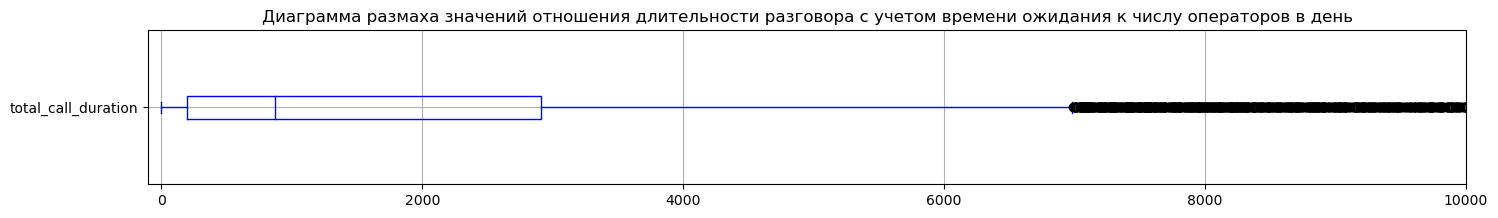

In [24]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data_group[['total_call_duration']].boxplot(vert = False, color='blue', ax =ax)
plt.xlim([-100, 10000])
ax.set_title(f'Диаграмма размаха значений отношения длительности разговора с учетом времени ожидания к числу операторов в день')
plt.show()

Мы нашли медианное время разговора у операторов - 869 единиц времени. Если предположить, что время в данных указано в минутах, то получится, что половина операторов в день разговаривает до 14,5 часов. С учетом, что рабочий день длится обычно 8 часов (или даже 12 часов смена), такие цифры выглядят неправдободобно.  

**Значит, время в предоставленных данных измеряется в секундах.**

Разделим данные о времени на 60, чтобы получить измерение времени в минутах - это необходимо для дальнейшего расчета стоимости тарифов, так как цены услуг провайдера расчитываются в минутах:

In [25]:
data_final['call_duration'] = round(data_final['call_duration'] / 60, 1)
data_final['total_call_duration'] = round(data_final['total_call_duration'] / 60, 1)
data_final.head(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
0,166377,2019-08-04,in,False,999,True,2,0.0,0.1,B,2019-08-01
1,166377,2019-08-05,out,True,880022,True,3,0.0,0.1,B,2019-08-01
2,166377,2019-08-05,out,True,880020,True,1,0.0,0.0,B,2019-08-01
3,166377,2019-08-05,out,True,880020,False,1,0.2,0.3,B,2019-08-01
4,166377,2019-08-05,out,False,880022,True,3,0.0,0.4,B,2019-08-01


### Определение периода данных, пригодного для анализа

Проверим, за какой период нам предоставлены данные:

In [26]:
print('Данные предоставлены с', data_final['date'].min(), 'по', data_final['date'].max())

Данные предоставлены с 2019-08-02 00:00:00 по 2019-11-28 00:00:00


Не хватает данных за несколько дней за август и ноябрь. Посмотрим, критично ли это для данных, оценив общее количество звонков за каждый месяц.

In [27]:
# добавим в таблицу столбец с номером месяца
data_final['month'] = pd.to_datetime(data_final['date']).dt.month
data_final.head(2)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,month
0,166377,2019-08-04,in,False,999,True,2,0.0,0.1,B,2019-08-01,8
1,166377,2019-08-05,out,True,880022,True,3,0.0,0.1,B,2019-08-01,8


,month,calls_count
3,11,21507
2,10,17146
1,9,8381
0,8,1858


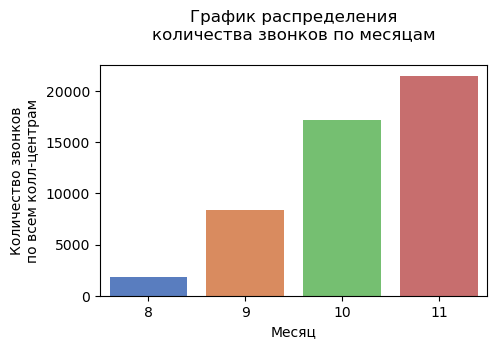

In [28]:
cnt_calls_per_month = (
    data_final
    .groupby('month', as_index=False)
    .agg({'calls_count':'count'}).sort_values(by='calls_count', ascending=False)
)

display(cnt_calls_per_month)

#построим визуализацию распределения количества звонков по месяцам
plt.figure(figsize=(5,3))
sns.set_palette('muted') 
sns.barplot(data=cnt_calls_per_month, x='month', y='calls_count')

plt.title('График распределения\nколичества звонков по месяцам\n')
plt.xlabel('Месяц')
plt.ylabel('Количество звонков\nпо всем колл-центрам')

plt.show()

Нехватка пары дней в ноябре, похоже, не мешает анализу - данных очень много (21.507 звонков). А вот за август данных не хватает - всего 1.858 звонков.  
**Таким образом, для анализа возьмем период с 01.09.2019 по 28.11.2019:**

In [29]:
data = data_final.query('"2019-09-01" <= date').copy()
print('Размер таблицы:', data.shape, '\n')
print('Данные в таблице с', data['date'].min(), 'по', data['date'].max())

Размер таблицы: (47034, 12) 

Данные в таблице с 2019-09-01 00:00:00 по 2019-11-28 00:00:00


### Определение активных пользователей

Определим, каких пользователей считать активными и учитывать в анализе:

In [30]:
# сделаем колонку с полным перечнем колл-центров
clients = pd.DataFrame(data['user_id'].unique())
clients.columns = ['user_id']
clients.shape

(303, 1)

In [31]:
# посчитаем суммарное количество звонков по каждому колл-центру,
# если звонок не был пропущен (на таких звонки не тратится время оператора)
cnt_calls_per_client = (
    data
    .query('is_missed_call == False')
    .groupby('user_id', as_index=False)
    .agg({'calls_count':'sum'}).sort_values(by='calls_count', ascending=False)
).reset_index(drop=True).copy()

cnt_calls_per_client

,user_id,calls_count
0,166582,70341
1,167626,38418
2,168361,37261
3,168252,15945
4,167827,12923
...,...,...
278,167288,1
279,166548,1
280,166585,1
281,167113,1


In [32]:
# посчитаем количество операторов по каждому колл-центру,
# предварительно убрав строки с заглушкой
cnt_operators_per_client = (
    data
    .query('operator_id != 999')
    .groupby('user_id', as_index=False)
    .agg({'operator_id':'nunique'}).sort_values(by='operator_id', ascending=False)
).reset_index(drop=True).copy()

cnt_operators_per_client

,user_id,operator_id
0,168187,50
1,167626,48
2,167497,30
3,168252,28
4,168361,27
...,...,...
281,167682,1
282,167716,1
283,167727,1
284,166993,1


In [33]:
# объединим данные по всем колл-центрам 
helper = clients.merge(cnt_calls_per_client, how='outer')
cnt = helper.merge(cnt_operators_per_client, how='outer')
display(cnt)
cnt.info()

,user_id,calls_count,operator_id
0,166377,2683.0,5.0
1,166391,2.0,1.0
2,166392,99.0,2.0
3,166399,9.0,1.0
4,166405,7987.0,10.0
...,...,...,...
298,168583,22.0,2.0
299,168598,21.0,1.0
300,168601,419.0,2.0
301,168603,10.0,1.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      303 non-null    int64  
 1   calls_count  283 non-null    float64
 2   operator_id  286 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


В нескольких колл-центрах вместо количества звонков и операторов отобразились пропуски. Посмотрим эти строки:

In [34]:
gaps = cnt.query('calls_count != calls_count or operator_id != operator_id').copy()
display(gaps)
gaps.shape

,user_id,calls_count,operator_id
8,166481,NaN,NaN
29,166666,NaN,NaN
95,167077,NaN,NaN
104,167114,NaN,NaN
105,167122,NaN,1.0
133,167265,NaN,NaN
142,167364,NaN,1.0
173,167631,NaN,NaN
185,167721,NaN,NaN
192,167768,NaN,NaN


(20, 3)

У двадцати колл-центров пропуски в количестве звонков (не считая пропущенных), и только у 3х из них есть оператор (при этом операторы не разговаривали, максимум - пропускали звонки, так как мы не учитываем пропущенные в таблице).  
Считать этих клиентов активными точно нельзя, значит первое определение активного клиента:  
**Активный клиент - это колл-центр, у которого есть операторы, и количество звонков (не считая пропущенных) не равно 0.**

Удалим эти колл-центры из датафрейма, и посмотрим, какие клиенты остались - всех ли оставшихся можно считать активными:

In [35]:
# создаем список неактивных пользователей
user_id_non_activ = gaps['user_id'].tolist()

In [36]:
# создаем обновленную таблицу, приводим в порядок типы данных
cnt_activ = (cnt
             .query(f'user_id not in {user_id_non_activ}')
             .reset_index(drop=True)
             .sort_values(by=['calls_count', 'operator_id'], ascending=False)
             .copy()
            )
cnt_activ['calls_count'] = cnt_activ['calls_count'].astype(int)
cnt_activ['operator_id'] = cnt_activ['operator_id'].astype(int)
cnt_activ

,user_id,calls_count,operator_id
19,166582,70341,3
164,167626,38418,48
263,168361,37261,27
253,168252,15945,28
189,167827,12923,3
...,...,...,...
18,166548,1,1
20,166585,1,1
100,167113,1,1
104,167139,1,1


Звонков в колл-центре №166582 больше всего, а оператора всего 3, в то время как у следующего по количеству звонков колл-центра 48 операторов.   
Тогда посмотрим **соотношение** количества звонков к количеству операторов в каждом колл-центре в месяц (так как клиенты разное количество времени зарегистрированы в сервисе провайдера):

In [37]:
# посчитаем, сколько дней клиент пользуется сервисом
data['cnt_days'] = data['date'].max() - data['date_start']
data['cnt_days'] = data['cnt_days'].dt.days

# добавим время пользования сервисом к таблице cnt_activ
helper = (
    data
    .groupby('user_id', as_index=False)
    .agg({'cnt_days':'max'}).sort_values(by='cnt_days', ascending=False)
).reset_index(drop=True).copy()

ratio = cnt_activ.merge(helper, how='left')

# создадим новый столбец, показывающий кол-во звонков на оператора в месяц
ratio['ratio'] = round(ratio['calls_count'] / ratio['operator_id'] / ratio['cnt_days'] * 30, 1)
ratio = ratio.sort_values(by='ratio', ascending=False)
ratio

,user_id,calls_count,operator_id,cnt_days,ratio
0,166582,70341,3,111,6337.0
14,167285,6075,1,79,2307.0
4,167827,12923,3,57,2267.2
20,168253,4279,2,41,1565.5
30,167756,2731,1,62,1321.5
...,...,...,...,...,...
267,166609,3,3,108,0.3
278,166548,1,1,112,0.3
279,166585,1,1,111,0.3
280,167113,1,1,87,0.3


Видно, что многие колл-центры зарегистрированы давно, но у них совершается меньше одного звонка в месяц на оператора. 
Так же заметно, что есть выброс в виде 6.337 звонков в месяц на оператора у одного колл-центра. 
Построим графики, ограничив их при построении:

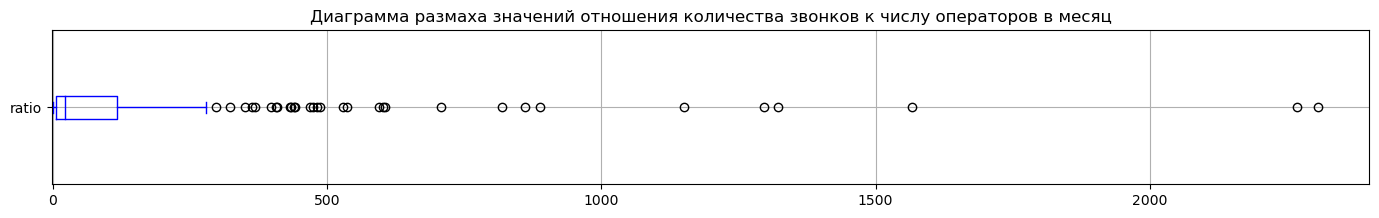

In [38]:
fig, ax = plt.subplots(figsize = (17,2))
ax = ratio[['ratio']].boxplot(vert = False, color='blue', ax =ax)
plt.xlim([-1, 2400])
ax.set_title(f'Диаграмма размаха значений отношения количества звонков к числу операторов в месяц')
plt.show()

Видно большое количество выбросов c большим количеством звонков.
Однако клиенты с малым количеством звонков в месяц на оператора попадают в большинство значений.  
Построим гистограмму, ограничив ее больше, чтобы посмотреть поближе большинство данных:

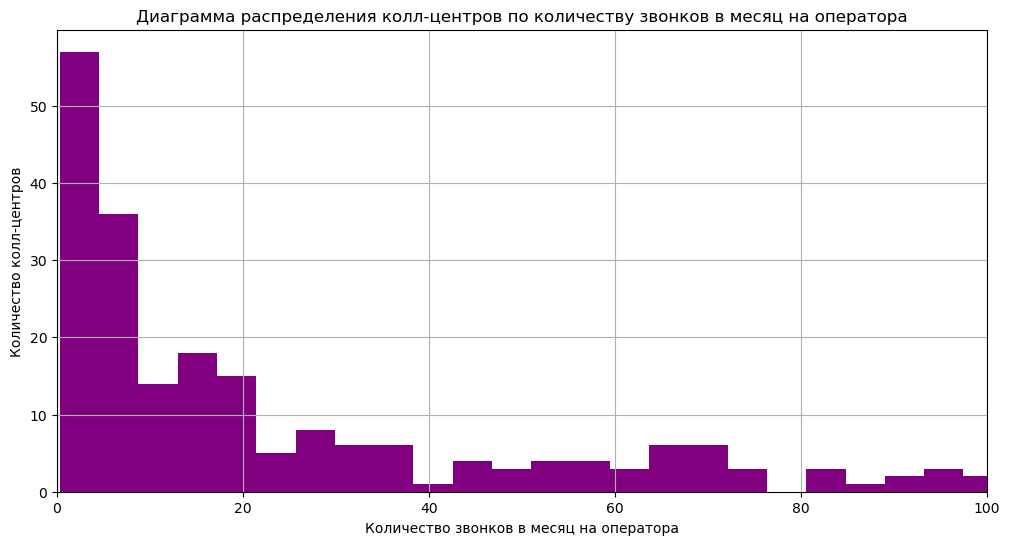

In [39]:
fig, ax = plt.subplots(figsize = (12,6))
ratio['ratio'].hist(bins=1500, color = 'purple')
plt.xlim([0, 100])
ax.set_title(f'Диаграмма распределения колл-центров по количеству звонков в месяц на оператора')
plt.xlabel('Количество звонков в месяц на оператора')
plt.ylabel('Количество колл-центров')
plt.show()

Судя по всему, у нас действительно много клиентов, которые не совершают большое количество звонков, но всё таки могут приносить доход.   
Среди них выделяются те, у которых меньше одного звонка в месяц на оператора - значит клиент звонит уж очень редко, иногда всего раз за несколько месяцев. Таких клиентов сложно считать активными, и для анализа они нам вряд ли пригодятся. Подкорректируем определение активного клиента:  
**Активный клиент - это колл-центр, у которого есть минимум один оператор, количество звонков (не считая пропущенных) больше 0, и отношение количества звонков за месяц к количеству операторов больше или равно 1.**

Удалим неактивных пользователей из датафрейма, чтобы оставить только необходимые данные для анализа:

In [40]:
# создаем второй список неактивных пользователей в дополнение к user_id_non_activ с первым отбором
non_activ = ratio.query('ratio < 1').copy()
non_activ_list = non_activ['user_id'].tolist()
non_activ_list

[167682,
 166874,
 167242,
 168366,
 166391,
 167288,
 166609,
 166548,
 166585,
 167113,
 167139]

In [41]:
# удалим неактивных пользователей из основного датафрейма (по обоим листам наших критериев)
data = data.query(f'user_id not in {user_id_non_activ}').copy()
data = data.query(f'user_id not in {non_activ_list}').copy()
data.shape

(46791, 13)

In [42]:
data.to_csv('data_activ_users.csv')

In [43]:
# удалим неактивных пользователей по второму критерию 
# из агрегированного датафрейма 
data_agg = ratio.query(f'user_id not in {non_activ_list}').copy()
data_agg.rename(columns = {'calls_count':'calls_cnt_sum', 
                           'operator_id':'operator_cnt'}, inplace=True)
data_agg

,user_id,calls_cnt_sum,operator_cnt,cnt_days,ratio
0,166582,70341,3,111,6337.0
14,167285,6075,1,79,2307.0
4,167827,12923,3,57,2267.2
20,168253,4279,2,41,1565.5
30,167756,2731,1,62,1321.5
...,...,...,...,...,...
276,168202,2,1,43,1.4
275,168090,2,1,45,1.3
264,166671,4,1,106,1.1
263,166669,4,1,106,1.1


### Выводы по предобработке данных

#### Дубликаты
В таблице telecom_dataset.csv было 4.900 дубликатов, мы удалили их из датафрейма.  
В telecom_clients.csv дубликатов нет.

#### Пропуски
Пропуски были в таблице telecom_dataset.csv в столбцах `internal` (110 пропусков = 0,2% данных) и `operator_id` (7.456 пропусков = 15% данных - значительное количество).  
Почти все звонки с пропусками в столбце `internal` - входящие (значит, бесплатные для наших клиентов и не повлияют на расчеты стоимости тарифов). Мы удалили эти строки с пропусками в `internal` из датафрейма (потеря данных минимальна - 0,2%).
`operator_id` скорее всего не заполняется там, где вызов - пропущенный входящий внешний.
Таким образом, пропуски в этом столбце не случайность, а закономерный сбор данных - трубку не брали (оператора не было вообще на этом звонке), поэтому данные `operator_id` не заполнились. Оставили эти пропуски без изменения.

#### Аномалии в данных
Обнаружено, что у некоторых строк количество звонков = 1, есть пропущенный звонок в is_missed_call (это может быть только тот единственный), однако время разговора call_duration не 0. Это похоже на аномалию в данных - некоторые звонки по ошибке записались в is_missed_call как пропущенные, хотя операторы разговаривали (время в call_duration не равно 0). Мы подкорректировали столбец is_missed_call, заменив True на False в таких случаях.

#### Типы и форматы данных
Изменены неверные типы данных в столбцах таблицы telecom_dataset.csv:
- в столбце `date` - object на datetime64; Так же лучше изменен формат данных на отображение только дат - без времени (оно везде нулевое, так как данные в таблицы агрегированы по дням).  
- в столбце `internal` - object на bool, так как значения в столбце - True и False.
- в столбце `operator_id` - float64 на int64 (так как идентификатор оператора - не дробное, а целое число). 

Так же поменяли тип данных в столбце `date_start` в таблице telecom_clients.csv - с object на datetime64. 

#### Объединение данных
Для удобства дальнейшего анализа объединили две таблицы - telecom_clients.csv и telecom_dataset.csv.

#### Определение единицы измерения данных (времени)

В предоставленных Заказчиком данных было непонятно, в каких единицах измерения собирались данные о длительности разговоров (столбцы `call_duration` и `total_call_duration`).   

Мы нашли медианное время разговора у операторов - 869 единиц времени. Предположили, что время в данных указано в минутах, тогда получалось, что половина операторов в день разговаривает до 14,5 часов. С учетом, что рабочий день длится обычно 8 часов (или даже 12 часов смена), такие цифры выглядели абсолютно неправдободобно.  

**Сделан вывод, что время в предоставленных данных измеряется в секундах.**

Для дальнейшего анализа мы перевели время из секунд в минуты, так как тарифы рассчитываются поминутно.** 

#### Период данных для анализа
Данные предоставлены с 2019-08-02 00:00:00 по 2019-11-28 00:00:00.  
В предоставленных данных не хватает данных за несколько дней за август и ноябрь.   
Мы изучили распределение данных, и выяснили, что нехватка пары дней в ноябре не мешает анализу - данных очень много (21.507 звонков). А вот за август данных не хватает - всего 1.858 звонков.
Таким образом, **для анализа взят период с 01.09.2019 по 28.11.2019.**

#### Определение активных клиентов
При анализе выяснилось, что есть клиенты, у которых нет операторов и звонков. Принято решение считать их неактивными.
Так же у нас  много клиентов, которые не совершают большое количество звонков, но всё таки могут приносить доход. Среди них выделяются те, у которых меньше одного звонка в месяц на оператора - значит клиент звонит уж очень редко, иногда всего раз за несколько месяцев. Таких клиентов сложно считать активными, и для анализа они нам вряд ли пригодятся.    

Выведено следующее определение:    
**Активный клиент - это колл-центр, у которого есть минимум один оператор, количество звонков (не считая пропущенных) больше 0, и отношение количества звонков за месяц к количеству операторов больше или равно 1.**

## Аналитическое исследование
### Общие показатели данных
Изучим общие показатели данных:

In [44]:
# рассчитаем средние длительности звонков
data['mean'] = round(data['call_duration'] / data['calls_count'], 1)
data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,month,cnt_days,mean
107,166377,2019-09-02,in,False,880028,False,2,1.1,1.2,B,2019-08-01,9,119,0.6
108,166377,2019-09-02,in,False,880026,False,1,0.5,0.6,B,2019-08-01,9,119,0.5
109,166377,2019-09-02,out,False,880026,False,16,30.9,33.0,B,2019-08-01,9,119,1.9
110,166377,2019-09-02,out,False,880026,True,6,0.0,2.8,B,2019-08-01,9,119,0.0
111,166377,2019-09-02,out,False,880028,False,20,42.2,44.8,B,2019-08-01,9,119,2.1


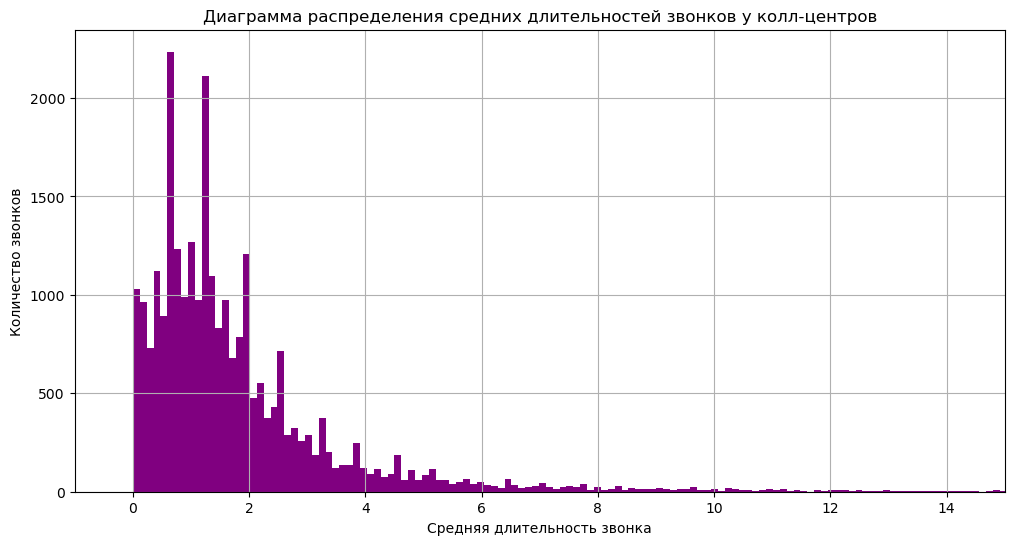

In [45]:
# построим гистограмму средних длительностей звонков у колл-центров,
# исключив пропущенные звонки
data_crop = data.query('is_missed_call != True')
fig, ax = plt.subplots(figsize = (12,6))
data_crop['mean'].hist(bins=500, color = 'purple')
ax.set_title(f'Диаграмма распределения средних длительностей звонков у колл-центров')
plt.xlim([-1, 15])
plt.xlabel('Средняя длительность звонка')
plt.ylabel('Количество звонков')
plt.show()

Звонков длительностью дольше 8 минут очень мало.   
Большинство звонков длится примерно до 4 минут.

In [46]:
# посмотрим количество клиентов - колл-центров:
print('Всего клиентов (колл-центров):', data_copy['user_id'].nunique())
print('Количество активных клиентов (колл-центров):', data['user_id'].nunique())
print('Количество неактивных клиентов (колл-центров):', data_copy['user_id'].nunique() - data['user_id'].nunique())

Всего клиентов (колл-центров): 307
Количество активных клиентов (колл-центров): 272
Количество неактивных клиентов (колл-центров): 35


In [47]:
# посмотрим количество операторов у клиентов
print('Минимальное количество операторов у активных клиентов (колл-центров):', data_agg['operator_cnt'].min())
print('Максимальное количество операторов у активных клиентов (колл-центров):', data_agg['operator_cnt'].max())
print('Медианное количество операторов у активных клиентов (колл-центров):', round(data_agg['operator_cnt'].median()))

Минимальное количество операторов у активных клиентов (колл-центров): 1
Максимальное количество операторов у активных клиентов (колл-центров): 50
Медианное количество операторов у активных клиентов (колл-центров): 2


#### Вывод
Звонков длительностью дольше 8 минут очень мало.  
Большинство звонков длится примерно до 4 минут.

Всего клиентов (колл-центров): 307  
Количество активных клиентов (колл-центров): 272  
Количество неактивных клиентов (колл-центров): 35

Минимальное количество операторов у активных клиентов (колл-центров): 1  
Максимальное количество операторов у активных клиентов (колл-центров): 50  
Медианное количество операторов у активных клиентов (колл-центров): 2

### Клиенты, для которых оптимальный тариф не совпадает с текущим
Выделим клиентов, для которых оптимальный тариф не совпадает с текущим.  

Сначала получим расходы клиентов за каждый месяц из периода анализа на каждом из тарифов - один тариф будет соответствовать текущему (фактическим расходам клиента, два других - возможные для перехода. 

Расходы клиента состоят из:
1. ежемесячной платы +
2. платы за перерасход по внутренним исходящим звонкам, с учетом времени ожидания (`total_call_duration`) +
3. платы за внешние исходящие звонки, с учетом времени ожидания (`total_call_duration`) +
4. платы за операторов

In [48]:
# создадим таблицу с клиентами по месяцам и количеством работающих в этот месяц операторов
data_months = (
    data
    .query('operator_id != 999')
    .groupby(['user_id', 'month'], as_index=False)
    .agg({'operator_id':'nunique'})
).reset_index(drop=True)

data_months

,user_id,month,operator_id
0,166377,9,4
1,166377,10,5
2,166377,11,4
3,166392,9,2
4,166392,10,2
...,...,...,...
607,168583,11,2
608,168598,11,1
609,168601,11,2
610,168603,11,1


In [49]:
# создадим таблицу с суммарной длительностью внутренних исходящих разговоров с учетом времени ожидания
internal_duration = (
    data
    .query('internal == True and direction == "out"')
    .groupby(['user_id', 'month'], as_index=False)
    .agg({'total_call_duration':'sum'})
).reset_index(drop=True)

non_internal_duration = (
    data
    .query('internal == False and direction == "out"')
    .groupby(['user_id', 'month'], as_index=False)
    .agg({'total_call_duration':'sum'})
).reset_index(drop=True)

helper = data_months.merge(internal_duration, how='left')
helper = helper.rename(columns={'total_call_duration':'tcd_internal'})
data_tariffs = helper.merge(non_internal_duration, how='left')
data_tariffs = data_tariffs.rename(columns={'total_call_duration':'tcd_external'})
data_tariffs

,user_id,month,operator_id,tcd_internal,tcd_external
0,166377,9,4,0.0,1763.1
1,166377,10,5,0.1,1653.2
2,166377,11,4,2.1,1589.9
3,166392,9,2,NaN,NaN
4,166392,10,2,NaN,NaN
...,...,...,...,...,...
607,168583,11,2,NaN,NaN
608,168598,11,1,NaN,NaN
609,168601,11,2,0.0,553.2
610,168603,11,1,NaN,19.8


In [50]:
# так как в таблице появились NaN - заполним их нулевыми значениями
data_tariffs['tcd_internal'] = data_tariffs['tcd_internal'].fillna(0)
data_tariffs['tcd_external'] = data_tariffs['tcd_external'].fillna(0)
data_tariffs

,user_id,month,operator_id,tcd_internal,tcd_external
0,166377,9,4,0.0,1763.1
1,166377,10,5,0.1,1653.2
2,166377,11,4,2.1,1589.9
3,166392,9,2,0.0,0.0
4,166392,10,2,0.0,0.0
...,...,...,...,...,...
607,168583,11,2,0.0,0.0
608,168598,11,1,0.0,0.0
609,168601,11,2,0.0,553.2
610,168603,11,1,0.0,19.8


In [51]:
# создадим функции, которые будут подсчитывать платежи по тарифам
# функция для подсчета платежей по тарифу А
def formula_A(row):
    if row['tcd_internal'] <= 2000:
        return 4000 + (row['tcd_external'] * 0.3) + (row['operator_id'] * 50)
    else:
        return 4000 + (row['tcd_external'] * 0.3) + (row['operator_id'] * 50) + ((row['tcd_internal'] - 2000)* 0.1)
    
# функция для подсчета платежей по тарифу В
def formula_B(row):
    if row['tcd_internal'] <= 500:
        return 2000 + (row['tcd_external'] * 0.5) + (row['operator_id'] * 150)
    else:
        return 2000 + (row['tcd_external'] * 0.5) + (row['operator_id'] * 150) + ((row['tcd_internal'] - 500)* 0.15)
    
# функция для подсчета платежей по тарифу C
def formula_C(row):
    return 1000 + (row['tcd_external'] * 0.7) + (row['operator_id'] * 300) + (row['tcd_internal'] * 0.3)

In [52]:
data_tariffs['A'] = data_tariffs.apply(formula_A, axis=1)
data_tariffs['B'] = data_tariffs.apply(formula_B, axis=1)
data_tariffs['C'] = data_tariffs.apply(formula_C, axis=1)
data_tariffs.head(10)

,user_id,month,operator_id,tcd_internal,tcd_external,A,B,C
0,166377,9,4,0.0,1763.1,4728.93,3481.55,3434.17
1,166377,10,5,0.1,1653.2,4745.96,3576.60,3657.27
2,166377,11,4,2.1,1589.9,4676.97,3394.95,3313.56
3,166392,9,2,0.0,0.0,4100.00,2300.00,1600.00
4,166392,10,2,0.0,0.0,4100.00,2300.00,1600.00
5,166392,11,2,0.0,0.0,4100.00,2300.00,1600.00
6,166399,9,1,0.0,0.0,4050.00,2150.00,1300.00
7,166399,10,1,0.0,0.0,4050.00,2150.00,1300.00
8,166405,9,4,0.0,2012.8,4803.84,3606.40,3608.96
9,166405,10,10,13.0,6298.0,6389.40,6649.00,8412.50


In [53]:
# создадим таблицу со средними расходами клиента на каждом из тарифов
data_tariffs_mean = (
    data_tariffs
    .groupby('user_id', as_index=False)
    .agg({'A':'mean', 'B':'mean', 'C':'mean'})
).reset_index(drop=True)

data_tariffs_mean['A'] = round(data_tariffs_mean['A'], 2)
data_tariffs_mean['B'] = round(data_tariffs_mean['B'], 2)
data_tariffs_mean['C'] = round(data_tariffs_mean['C'], 2)
data_tariffs_mean

,user_id,A,B,C
0,166377,4717.29,3484.37,3468.33
1,166392,4100.00,2300.00,1600.00
2,166399,4050.00,2150.00,1300.00
3,166405,5875.69,5615.03,6722.54
4,166406,4550.17,3050.28,2651.79
...,...,...,...,...
267,168583,4075.00,2225.00,1450.00
268,168598,4050.00,2150.00,1300.00
269,168601,4265.96,2576.60,1987.24
270,168603,4055.94,2159.90,1313.86


In [54]:
# добавим в таблицу столбец с наименованием текущего тарифа клиента
data_ct = data_tariffs_mean.merge(tariffs[['user_id', 'tariff_plan']], how='left')
data_ct = data_ct.rename(columns={'tariff_plan':'current_tariff'})
data_ct.head()

,user_id,A,B,C,current_tariff
0,166377,4717.29,3484.37,3468.33,B
1,166392,4100.00,2300.00,1600.00,C
2,166399,4050.00,2150.00,1300.00,C
3,166405,5875.69,5615.03,6722.54,B
4,166406,4550.17,3050.28,2651.79,B


In [55]:
# создадим функцию, которая будет сравнивать плату текущего тарифа с двумя другими,
# и выводить в новый столбец наиболее выгодный вариант
def better_tariff(row):
    minimum = min(row['A'], row['B'], row['C'])
    letter = str()
    
    if minimum == row['A']:
        letter = 'A'
    elif minimum == row['B']:
        letter = 'B'
    else:
        letter = 'C'      
    
    return letter

In [56]:
# создаем новый столбец с наиболее выгодным тарифом
data_ct['new_tariff'] = data_ct.apply(better_tariff, axis=1)
data_ct.head()

,user_id,A,B,C,current_tariff,new_tariff
0,166377,4717.29,3484.37,3468.33,B,C
1,166392,4100.00,2300.00,1600.00,C,C
2,166399,4050.00,2150.00,1300.00,C,C
3,166405,5875.69,5615.03,6722.54,B,B
4,166406,4550.17,3050.28,2651.79,B,C


У некоторых клиентов в обеих колонках тарифы совпадают - значит, они уже находятся на оптимальном тарифе. Отфильтруем данные, оставив только клиентов, у которых оптимальный тариф не совпадает с текущим, и убрав столбцы со средними значениями (так как Заказчик просил итоговый образ таблицы с 3-мя столбцами - идентификатором клиента, старым и новым тарифом):

In [57]:
data_tariffs_final = (
    data_ct
    .query('current_tariff != new_tariff')[['user_id', 'current_tariff', 'new_tariff']]
)
data_tariffs_final

,user_id,current_tariff,new_tariff
0,166377,B,C
4,166406,B,C
5,166407,A,B
6,166428,B,C
10,166495,B,C
...,...,...,...
262,168500,B,C
264,168562,B,C
266,168579,B,C
267,168583,B,C


#### Вывод
После сравнения средних трат клиентов стало ясно, что из 272 активных клиентов (колл-центров) почти половина (123 клиента) используют не оптимальный тариф -  траты этих клиентов могут стать меньше, если они перейдут на новый рекомендованный тариф.  
**В итоговой таблице в соответствии с заданием Заказчика отображены id клиентов с неоптимальным тарифом, текущий тариф и рекомендованный тариф:**

In [58]:
data_tariffs_final

,user_id,current_tariff,new_tariff
0,166377,B,C
4,166406,B,C
5,166407,A,B
6,166428,B,C
10,166495,B,C
...,...,...,...
262,168500,B,C
264,168562,B,C
266,168579,B,C
267,168583,B,C


### Изменение в выручке для Заказчика при смене тарифов
Изучим, как изменится ежемесячная выручка Заказчика, если клиенты перейдут на новые, более выгодные для них тарифы.

In [59]:
# создадим функции, добляющие суммы оплат по тарифам к таблице
def sumic_current_tariff(row):

    sum_ = 0
    if row['current_tariff'] == 'A':
        sum_ = row['A']
    elif row['current_tariff'] == 'B':
        sum_ = row['B']
    else:
        sum_ = row['C']

    return sum_

def sumic_new_tariff(row):

    sum_ = 0
    if row['new_tariff'] == 'A':
        sum_ = row['A']
    elif row['new_tariff'] == 'B':
        sum_ = row['B']
    else:
        sum_ = row['C']

    return sum_

In [60]:
# добавим столбцы с суммами оплат по тарифам
data_ct['current_sum'] = data_ct.apply(sumic_current_tariff, axis=1) 
data_ct['new_tariff_sum'] = data_ct.apply(sumic_new_tariff, axis=1) 
data_ct.head()

,user_id,A,B,C,current_tariff,new_tariff,current_sum,new_tariff_sum
0,166377,4717.29,3484.37,3468.33,B,C,3484.37,3468.33
1,166392,4100.00,2300.00,1600.00,C,C,1600.00,1600.00
2,166399,4050.00,2150.00,1300.00,C,C,1300.00,1300.00
3,166405,5875.69,5615.03,6722.54,B,B,5615.03,5615.03
4,166406,4550.17,3050.28,2651.79,B,C,3050.28,2651.79


In [61]:
# посмотрим выручку Заказчика
print('Текущая средняя выручка Заказчика за месяц:', round(data_ct['current_sum'].sum()), 'рублей')
print('Предполагаемая средняя выручка Заказчика за месяц:', round(data_ct['new_tariff_sum'].sum()), 'рублей')
print('Предполагаемое снижение средней выручки Заказчика за месяц:', round(data_ct['new_tariff_sum'].sum() - data_ct['current_sum'].sum()), 'рублей (', round((data_ct['new_tariff_sum'].sum() - data_ct['current_sum'].sum())/data_ct['current_sum'].sum() * 100, 2), '%)')

Текущая средняя выручка Заказчика за месяц: 735595 рублей
Предполагаемая средняя выручка Заказчика за месяц: 623344 рублей
Предполагаемое снижение средней выручки Заказчика за месяц: -112251 рублей ( -15.26 %)


#### Вывод
**Предполагаемое снижение выручки Заказчика составит около 15.3%**, если клиенты перейдут на более оптимальные для них тарифы.

### Проверка статистических гипотез

In [62]:
# подготовим данные для проверки гипотезы - 
# таблицу, сколько была фактическая в месяц выручка Заказчика,
# и сколько она составила бы в месяц при оптимальных тарифах

helper = data_tariffs.merge(tariffs[['user_id', 'tariff_plan']], how='left')
helper = helper.rename(columns={'tariff_plan':'current_tariff'})
helper['new_tariff'] = helper.apply(better_tariff, axis=1)
helper['current_sum'] = helper.apply(sumic_current_tariff, axis=1) 
helper['new_tariff_sum'] = helper.apply(sumic_new_tariff, axis=1) 

data_revenue = (
    helper
    .groupby('month', as_index=False)
    .agg({'current_sum':'sum', 'new_tariff_sum':'sum'})
).reset_index(drop=True).copy()

data_revenue

,month,current_sum,new_tariff_sum
0,9,407073.81,333242.200
1,10,623715.01,534764.020
2,11,645687.57,546269.125


#### Гипотеза №1 - Уменьшится ли выручка Заказчика, если клиенты перейдут на более выгодные для них тарифы?

**Нулевая гипотеза:** значение выручки Заказчика за месяц при текущих тарифах клиентов **равна** значению выручки Заказчика за месяц при переходе клиентов на более выгодные для них тарифы.

**Альтернативная гипотеза:** значение выручки Заказчика за месяц при текущих тарифах клиентов **больше**, чем будет  значение выручки Заказчика за месяц при переходе клиентов на более выгодные для них тарифы.

In [63]:
#проверим гипотезу

alpha = 0.05

results = st.ttest_ind(data_revenue['current_sum'], data_revenue['new_tariff_sum'], alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.2216970027844099
Нет оснований отвергнуть нулевую гипотезу


Полученное значение p-value (~0.22) меньше заданного уровня значимости, поэтому отвергаем нулевую гипотезу.   

Есть основания говорить, что значение выручки Заказчика за месяц при текущих тарифах клиентов **больше**, чем будет  значение выручки Заказчика за месяц при переходе клиентов на более выгодные для них тарифы.

#### Вывод
Есть основания говорить, что значение выручки Заказчика уменьшится при переходе клиентов на более выгодные для них тарифы.

#### Гипотеза №2 - Выручка на тарифе А значительно больше, чем на двух других тарифах.

**Нулевая гипотеза:** выручка Заказчика за месяц на тарифе А **выше** значения выручки Заказчика за месяц на двух других тарифах.

**Альтернативная гипотеза:** выручка Заказчика за месяц на тарифе А **такая же или ниже** значения выручки Заказчика за месяц на двух других тарифах.

In [64]:
# подготовим данные для проверки гипотезы - 

helper = data_tariffs.merge(tariffs[['user_id', 'tariff_plan']], how='left')
helper = helper.rename(columns={'tariff_plan':'current_tariff'})
helper['new_tariff'] = helper.apply(better_tariff, axis=1)
helper['current_sum'] = helper.apply(sumic_current_tariff, axis=1) 
helper['new_tariff_sum'] = helper.apply(sumic_new_tariff, axis=1) 

revenue_A = (
    helper
    .query('current_tariff == "A"')
    .groupby('month', as_index=False)
    .agg({'A':'sum'})
).reset_index(drop=True).copy()

revenue_BC = (
    helper
    .query('current_tariff != "A"')
    .groupby('month', as_index=False)
    .agg({'B':'sum', 'C':'sum'})
).reset_index(drop=True).copy()

revenue_BC['BC'] = revenue_BC['B'] + revenue_BC['C']

revenue_ABC = revenue_A.merge(revenue_BC, how='outer') 
revenue_ABC

,month,A,B,C,BC
0,9,100508.18,344457.50,276935.50,621393.00
1,10,165334.07,531954.30,428973.96,960928.26
2,11,160032.43,559080.13,455380.07,1014460.20


In [65]:
#проверим гипотезу
alpha = 0.05

results = st.ttest_ind(revenue_ABC['A'], revenue_ABC['BC'], alternative='less')

print(f'p-value: {results.pvalue}')


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.002200659267107147
Отвергаем нулевую гипотезу


Полученное значение p-value (0.002) меньше заданного уровня значимости, поэтому отвергаем нулевую гипотезу.   
Есть основания говорить, что выручка Заказчика за месяц на тарифе А **такая же или ниже** значения выручки Заказчика за месяц на двух других тарифах.

#### Вывод
Есть основания говорить, что выручка Заказчика за месяц на тарифе А **такая же или ниже** значения выручки Заказчика за месяц на двух других тарифах.

## Выводы на основе анализа данных
#### Задача 
<b>Была поставлена задача</b> - выделить активных клиентов, для которых оптимальный тариф не совпадает с текущим, и подобрать для них новый (более выгодный для них) тариф.</b>    

#### Проблемы в данных, обнаруженные при предобработке исходных данных
    
В ходе изучения исходных данных и их предобработке выявлены следующие проблемы:   

**1. Дубликаты:**
- в таблице telecom_dataset.csv было 4.900 дубликатов, мы удалили их из датафрейма. В telecom_clients.csv дубликатов нет.  

**2. Пропуски:**
- пропуски были в таблице telecom_dataset.csv в столбцах `internal` (110 пропусков = 0,2% данных) и `operator_id` (7.456 пропусков = 15% данных - значительное количество).   
- почти все звонки с пропусками в столбце `internal` - входящие (значит, бесплатные для наших клиентов и не повлияют на расчеты стоимости тарифов). Мы удалили эти строки с пропусками в `internal` из датафрейма (потеря данных минимальна - 0,2%).   
- `operator_id` скорее всего не заполняется там, где вызов - пропущенный входящий внешний. Таким образом, пропуски в этом столбце не случайность, а закономерный сбор данных - трубку не брали (оператора не было вообще на этом звонке), поэтому данные `operator_id` не заполнились. Оставили эти пропуски без изменения.

**3. Аномалии в данных:**
- было обнаружено, что у некоторых строк количество звонков = 1, есть пропущенный звонок в is_missed_call (это может быть только тот единственный), однако время разговора call_duration не 0. Это похоже на аномалию в данных - некоторые звонки по ошибке записались в is_missed_call как пропущенные, хотя операторы разговаривали (время в call_duration не равно 0). Мы подкорректировали столбец is_missed_call, заменив True на False в таких случаях.  

**4. Неверные типы и форматы данных в столбцах таблицы telecom_dataset.csv:** 
- в столбце `date` - object на datetime64; Так же лучше изменен формат данных на отображение только дат - без времени (оно везде нулевое, так как данные в таблицы агрегированы по дням).  
- в столбце `internal` - object на bool, так как значения в столбце - True и False.
- в столбце `operator_id` - float64 на int64 (так как идентификатор оператора - не дробное, а целое число).

**5. Неверные типы и форматы данных в столбцах таблицы telecom_clients.csv:**
- поменяли тип данных в столбце `date_start` - с object на datetime64.   

**6. Единицы измерения времени:**   
В предоставленных Заказчиком данных было непонятно, в каких единицах измерения собирались данные о длительности разговоров (столбцы `call_duration` и `total_call_duration`). Мы нашли медианное время разговора у операторов - 869 единиц времени. Предположили, что время в данных указано в минутах, тогда получалось, что половина операторов в день разговаривает до 14,5 часов. С учетом, что рабочий день длится обычно 8 часов (или даже 12 часов смена), такие цифры выглядели абсолютно неправдободобно.  
**Сделан вывод, что время в предоставленных данных измеряется в секундах.**  
Для дальнейшего анализа мы перевели время из секунд в минуты, так как тарифы рассчитываются поминутно. 

**7. Период данных для анализа:**  
Данные предоставлены с 02.08.2019 по 28.11.2019.  
В предоставленных данных не хватает данных за несколько дней за август и ноябрь.   
Мы изучили распределение данных, и выяснили, что нехватка пары дней в ноябре не мешает анализу - данных очень много (21.507 звонков). А вот за август данных не хватает - всего 1.858 звонков.
Таким образом, **для анализа взят период с 01.09.2019 по 28.11.2019.**

**8.Определение активных клиентов:**   
При анализе выяснилось, что есть клиенты, у которых нет операторов и звонков. Принято решение считать их неактивными.
Так же у нас  много клиентов, которые не совершают большое количество звонков, но всё таки могут приносить доход. Среди них выделяются те, у которых меньше одного звонка в месяц на оператора - значит клиент звонит уж очень редко, иногда всего раз за несколько месяцев. Таких клиентов сложно считать активными, и для анализа они нам вряд ли пригодятся.    

Выведено следующее определение:    
**Активный клиент - это колл-центр, у которого есть минимум один оператор, количество звонков (не считая пропущенных) больше 0, и отношение количества звонков за месяц к количеству операторов больше или равно 1.**

#### Ход исследования 

После обработки, устранения недочетов в исходных данных и их уточнения, было проведено исследование:
- изучены общие показатели данных (средняя длительность звонков, количество активных и неактивных клиентов - колл-центров, количество операторов у клиентов). 
- выделены клиенты, для которых оптимальный тариф не совпадает с текущим. Для этого:

1) получены расходы клиентов за каждый месяц из периода анализа на каждом из тарифов - один тариф будет соответствует текущему (фактическим расходам клиента, два других - возможные для перехода);  
2) вычислены средние затраты клиента за месяц за период анализа на каждом тарифе.  
3) произведено сравнение среднее текущего тарифа с двумя другими средними тарифов. Создан новый столбец с рекомендуемым тарифом.   
4) создана новая таблица-срез, где у клиента (колл-центра) старый тариф не совпадает с новым тарифом.

- показаны изменения в выручке для заказчика (общей, в месяц, на клиента) при смене тарифов, чтобы показать, какой процент выручки в месяц потеряет Заказчик.
- проверены 2 статистические гипотезы:  

1) Гипотеза №1 - Уменьшится ли выручка Заказчика, если клиенты перейдут на более выгодные для них тарифы?  
- **Нулевая гипотеза:** значение выручки Заказчика за месяц при текущих тарифах клиентов **равна** значению выручки Заказчика за месяц при переходе клиентов на более выгодные для них тарифы.

- **Альтернативная гипотеза:** значение выручки Заказчика за месяц при текущих тарифах клиентов **больше**, чем будет значение выручки Заказчика за месяц при переходе клиентов на более выгодные для них тарифы.

2) Гипотеза №2 - Выручка на тарифе А значительно больше, чем на двух других тарифах.

- **Нулевая гипотеза:** выручка Заказчика за месяц на тарифе А **выше** значения выручки Заказчика за месяц на двух других тарифах.

- **Альтернативная гипотеза:** выручка Заказчика за месяц на тарифе А **такая же или ниже** значения выручки Заказчика за месяц на двух других тарифах.

По итогам проверки обеих статистических гипотез сделаны выводы:
- есть основания говорить, что значение выручки Заказчика уменьшится при переходе клиентов на более выгодные для них тарифы.
- есть основания говорить, что выручка Заказчика за месяц на тарифе А **такая же или ниже** значения выручки Заказчика за месяц на двух других тарифах.

По итогам аналитического исследования сделаны выводы и рекомендации, поготовлена презентация и дашборд.

#### Выводы по результатам аналитического исследования данных

Нам предоставлены данные за период с 02.08.2019 по 28.11.2019 (данные за 4 месяца).   
Однако достаточное количество данных для анализа есть только за период с 01.09.2019 по 28.11.2019 (3 месяца).

Сбор данных о длительности разговоров Заказчиком осуществляется в секундах, однако плата в тарифах исчисляется поминутно. Для анализа время было переведено в минуты.

Выведено следующее определение:    
Активный клиент - это колл-центр, у которого есть минимум один оператор, количество звонков (не считая пропущенных) больше 0, и отношение количества звонков за месяц к количеству операторов больше или равно 1.

Звонков длительностью дольше 8 минут у клиентов очень мало. Большинство звонков длится примерно до 4 минут.

Всего клиентов (колл-центров) 307, из них активных - 272.

Минимальное количество операторов у активных клиентов (колл-центров) -  1, максимальное - 50.   
Медианное количество операторов у активных клиентов (колл-центров) - 2 оператора.

**После сравнения средних трат клиентов стало ясно, что из 272 активных клиентов (колл-центров) почти половина (123 клиента) используют не оптимальный тариф -  траты этих клиентов могут стать меньше, если они перейдут на новый рекомендованный тариф.  
В итоговой таблице в соответствии с заданием Заказчика отображены id клиентов с неоптимальным тарифом, текущий тариф и рекомендованный тариф:**

In [66]:
data_tariffs_final

,user_id,current_tariff,new_tariff
0,166377,B,C
4,166406,B,C
5,166407,A,B
6,166428,B,C
10,166495,B,C
...,...,...,...
262,168500,B,C
264,168562,B,C
266,168579,B,C
267,168583,B,C


**Предполагаемое снижение выручки Заказчика составит около 15.3%, если клиенты перейдут на более оптимальные для них тарифы.**  

При проверке статистических гипотез сделаны следующие выводы:   
- есть основания говорить, что **значение выручки Заказчика уменьшится при переходе клиентов на более выгодные для них тарифы.**
- есть основания говорить, что **выручка Заказчика за месяц на тарифе А такая же или ниже значения выручки Заказчика за месяц на двух других тарифах.**

#### Рекомендации
1. Рекомендуется подумать о компенсации падения выручки при переводе клиентов на более выгодные тарифы. Возможно, стоит сделать рассылку по новым или потенциальным клиентам, чтобы вернуть их в пользование сервисом. Или запустить какую-то акцию или рекламу, сообщив клиентам о том, что почти 50% клиентов будут переведены на более дешевые тарифы. 
2. Стоит рассмотреть варианты добавления других тарифов с достаточно большой абонентской платой и входящим в эту плату пакетом исходящих минут, так тариф А приносит больше вырчуки, чем тарифы В и С вместе взятые
2. Стоит настроить сбор данных о длительности разговоров в минутах, а не секундах, так как исчисление платы за тариф происходит поминутно. 
3. Рекомендуется выяснить, откуда взялась аномалия в данных, при которой звонки ошибочно записываются в пропущенные, хотя операторы разговаривали.

## Презентация (ссылка)
Презентация расположена по ссылке: https://github.com/Kris-Soloveva/Portfolio/blob/main/Поиск%20клиентов%20с%20неоптимальными%20тарифами/Презентация.pdf